In this notebook we are comparing matchday xGs and cumulative xGs for previous LaLiga 10 matches of the season 23/24.

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.korotkova.main_data import show_table_data

In [93]:
# Reading needed data
current_match = pd.read_csv("src/patenko/data/BAR_RMA_2023_understat/players.csv")
team_res_history = pd.read_csv("src/patenko/data/BAR_RMA_2023_understat/team_res_history.csv")
player_shots_history = pd.read_csv("src/patenko/data/BAR_RMA_2023_understat/player_shots_history.csv")
season_results = pd.read_csv("src/patenko/data/BAR_RMA_2023_understat/season_results.csv")
player_matches_history = pd.read_csv("src/patenko/data/BAR_RMA_2023_understat/player_matches_history.csv")

In [118]:
# Get the match IDs for previous matches of clubs before an El Clasico
real_prev_matches = season_results[((season_results['h.title'] == 'Real Madrid') | (season_results['a.title'] == 'Real Madrid')) & (season_results['datetime'] < '2023-10-28')]['id'].tolist()
barcelona_prev_matches = season_results[((season_results['h.title'] == 'Barcelona') | (season_results['a.title'] == 'Barcelona')) & (season_results['datetime'] < '2023-10-28')]['id'].tolist()

# Filter and sort player shots history for clubs' last 10 matches
real_last10_shots = player_shots_history[player_shots_history['match_id'].isin(real_prev_matches)].sort_values(by='match_id', ascending=True)
barcelona_last10_shots = player_shots_history[player_shots_history['match_id'].isin(barcelona_prev_matches)].sort_values(by='match_id', ascending=True)

# Calculate the cumulative xG for each player in clubs' last 10 matches
real_last10_xg = real_last10_shots.groupby('player')['xG'].sum().sort_values(ascending=False)
barcelona_last10_xg = barcelona_last10_shots.groupby('player')['xG'].sum().sort_values(ascending=False)

# Concatenate and sort the cumulative xG values for both teams
teams_last10_xg = pd.concat([real_last10_xg, barcelona_last10_xg], axis=0).sort_values(ascending=False)
teams_last10_xg = pd.DataFrame({'player': teams_last10_xg.index, 'xG': teams_last10_xg.values})

# Extract and format relevant columns from the current match data
current_match_xg = current_match[['player', 'xG', 'time']].sort_values(by='xG', ascending=False).reset_index(drop=True)
current_match_xg['player_time'] = current_match_xg['player'] + ' (' + current_match_xg['time'].astype(str) + ')'

# Merge the cumulative xG data with the current match data based on player names
match_last10_xg = pd.merge(teams_last10_xg, current_match_xg, how='left', suffixes = ("_last10", "_match"), on='player').sort_values(by='xG_match', ascending=False)

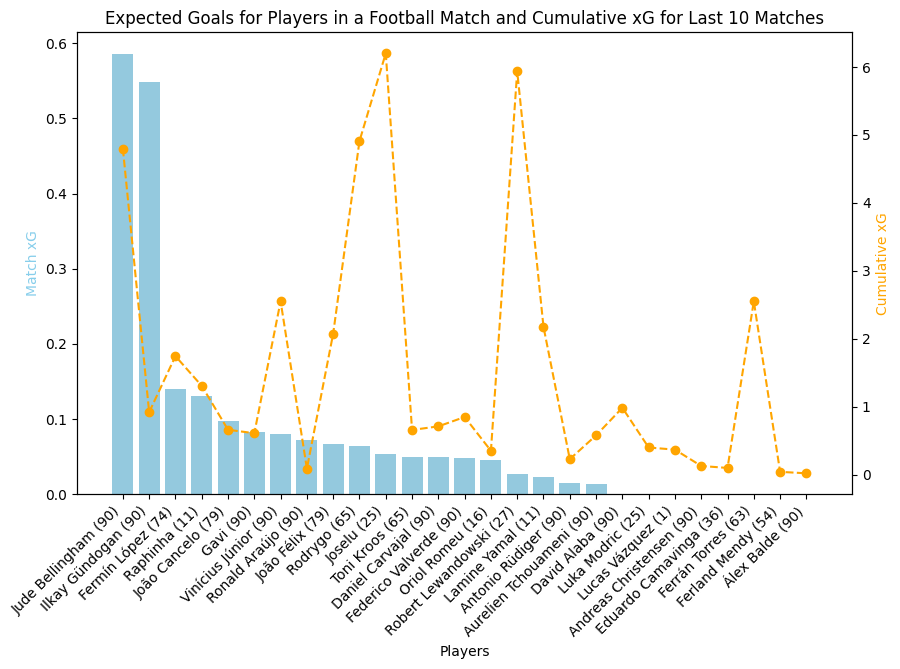

In [121]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Match_xG on the primary y-axis
sns.barplot(x='player_time', y='xG_match', data=match_last10_xg, color='skyblue', label='Match xG', ax=ax1)
ax1.set_ylabel('Match xG', color='skyblue')

# Create a secondary y-axis for Cumulative_xG
ax2 = ax1.twinx()
ax2.plot(match_last10_xg['player_time'], match_last10_xg['xG_last10'], marker='o', color='orange', label='Last 10 xG', linestyle='dashed')
ax2.set_ylabel('Cumulative xG', color='orange')

# Adding labels and title
ax1.set_xlabel('Players')
ax1.set_title('Expected Goals for Players in a Football Match and Cumulative xG for Last 10 Matches')

# Rotating x-axis labels for better readability
ax1.set_xticklabels(match_last10_xg['player_time'], rotation=45, ha='right')

# Show the plot
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


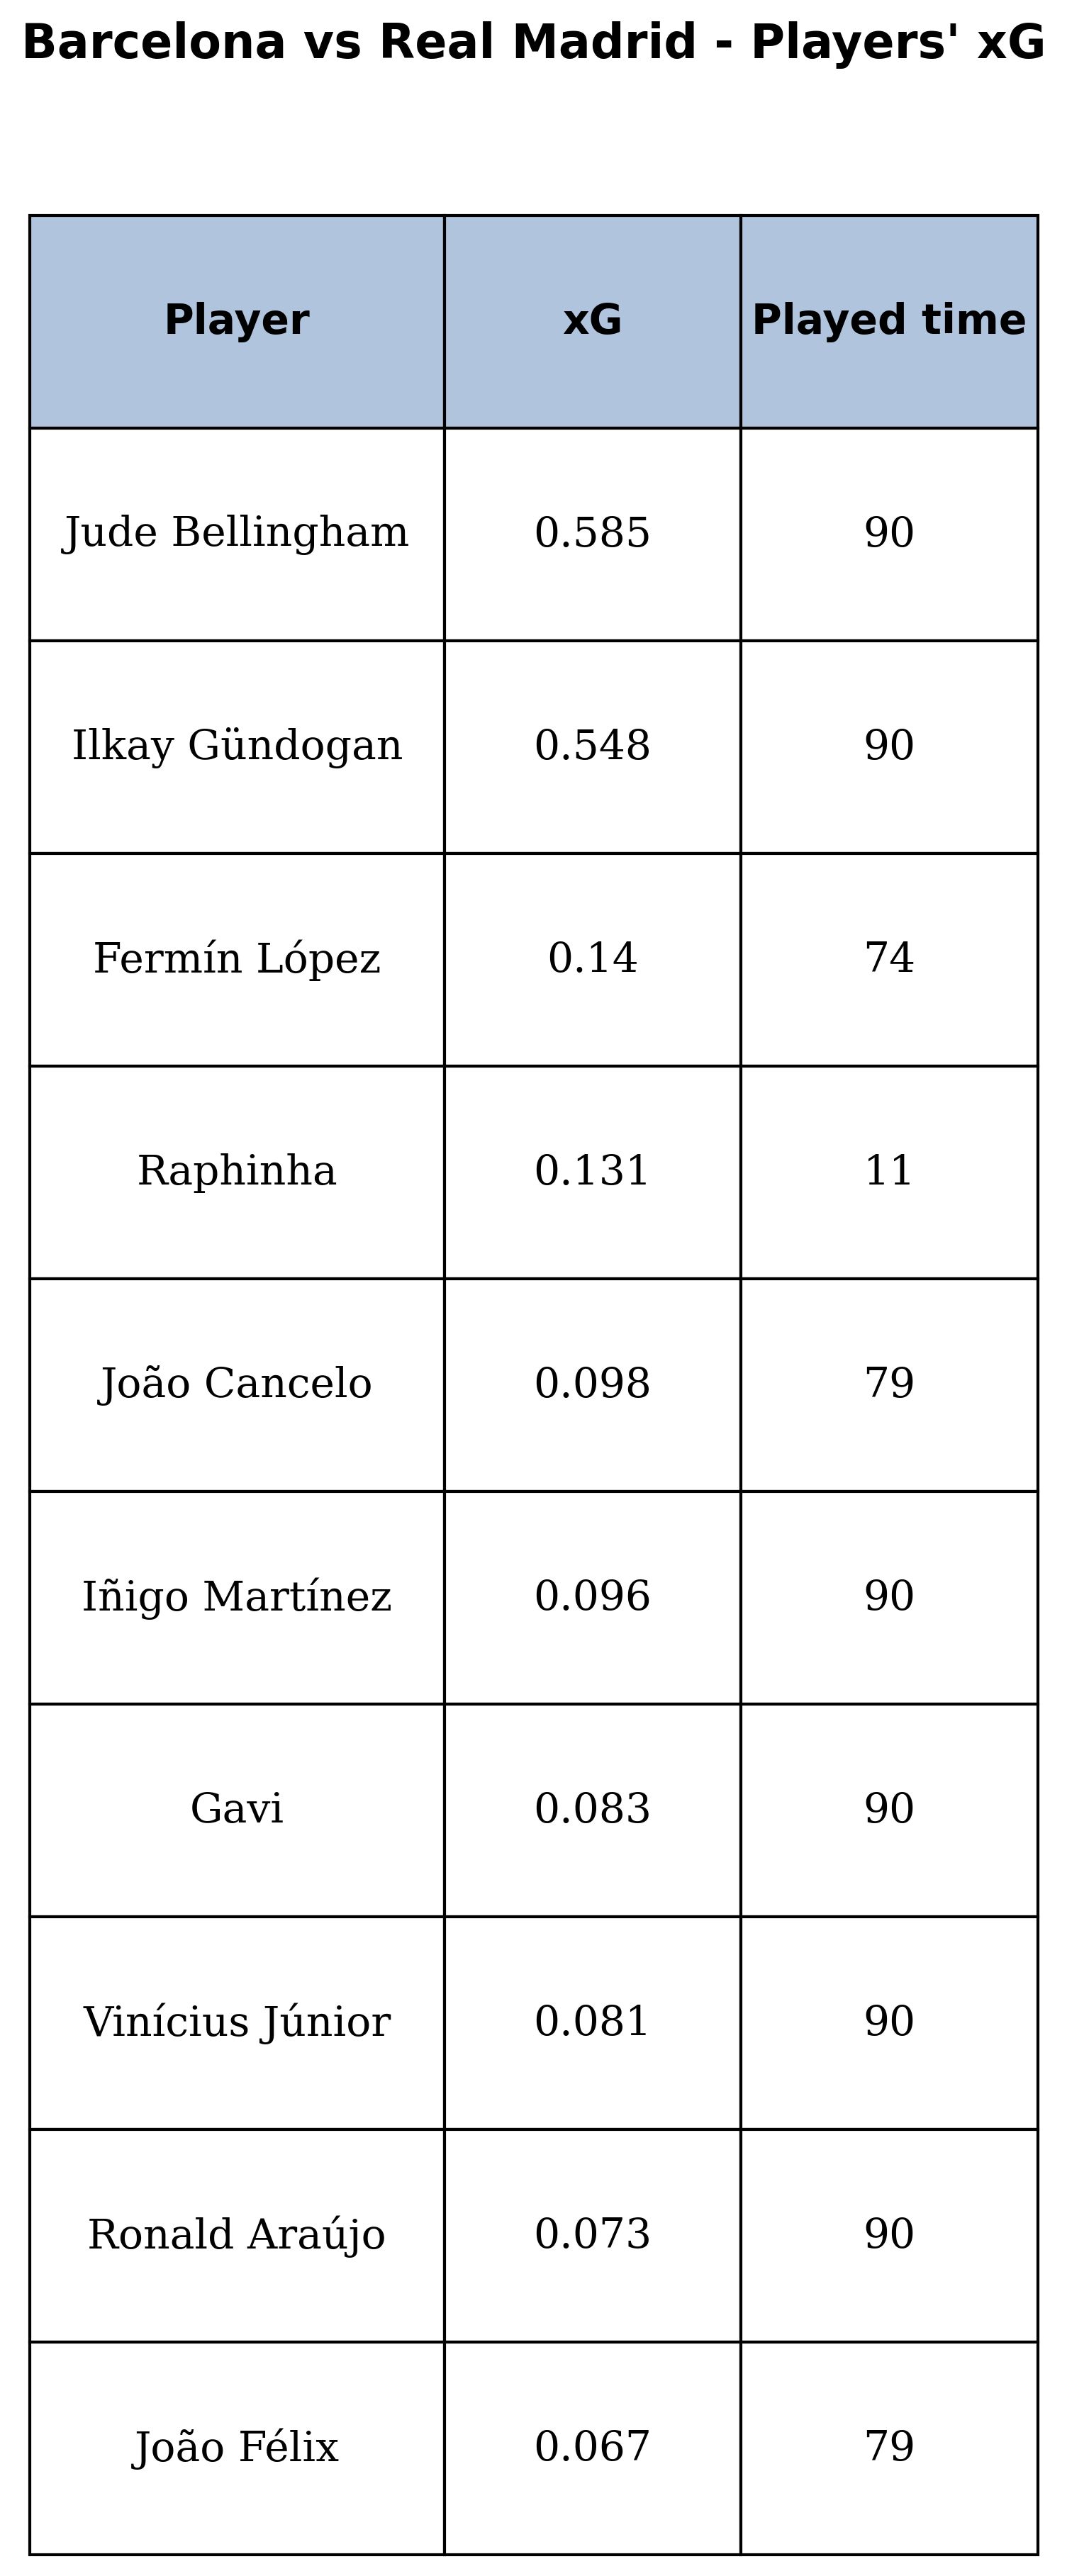

In [135]:
# Show table for TOP-10 xG score players
current_match_for_visualization = current_match_xg[['player', 'xG', 'time']]
current_match_for_visualization['xG'] = round(current_match_for_visualization['xG'], 3)
columns = ['Player', 'xG', 'Played time']
show_table_data(columns=columns, table_data=current_match_for_visualization.values.tolist()[:10], scaleX=3, scaleY=6, fig_size=(6, 9), title="Players' xG", pad=200)